<a href="https://colab.research.google.com/github/VectorReaves/Crypto-Predictions/blob/main/accuracyWithprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from fbprophet import Prophet
from google.colab import drive 
drive.mount('/content/gdrive')
from datetime import datetime

Mounted at /content/gdrive


In [10]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

              ds             y
0     2014-09-17    457.334015
1     2014-09-18    424.440002
2     2014-09-19    394.795990
3     2014-09-20    408.903992
4     2014-09-21    398.821014
...          ...           ...
2705  2022-02-12  42244.468750
2706  2022-02-13  42197.515625
2707  2022-02-14  42586.917969
2708  2022-02-15  44575.203125
2709  2022-02-16  43734.277344

[2710 rows x 2 columns]


In [11]:
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
# Let's make predictions.
future = prophet.make_future_dataframe(periods=365)
print(future)

             ds
0    2014-09-17
1    2014-09-18
2    2014-09-19
3    2014-09-20
4    2014-09-21
...         ...
3070 2023-02-12
3071 2023-02-13
3072 2023-02-14
3073 2023-02-15
3074 2023-02-16

[3075 rows x 1 columns]


In [13]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
2875,2022-08-01,71301.592659,64248.279903,77934.555017
2876,2022-08-02,71411.580020,64318.187721,78385.972358
2877,2022-08-03,71579.486666,64291.436395,78312.276956
2878,2022-08-04,71722.518080,64792.921675,78448.147479
2879,2022-08-05,71881.832218,64823.437324,78968.971253
...,...,...,...,...
3070,2023-02-12,87682.692822,80560.624721,95728.587192
3071,2023-02-13,88030.799971,80926.749143,96229.891448
3072,2023-02-14,88339.187972,80850.402207,95730.663131
3073,2023-02-15,88701.118290,80897.049473,96309.565199


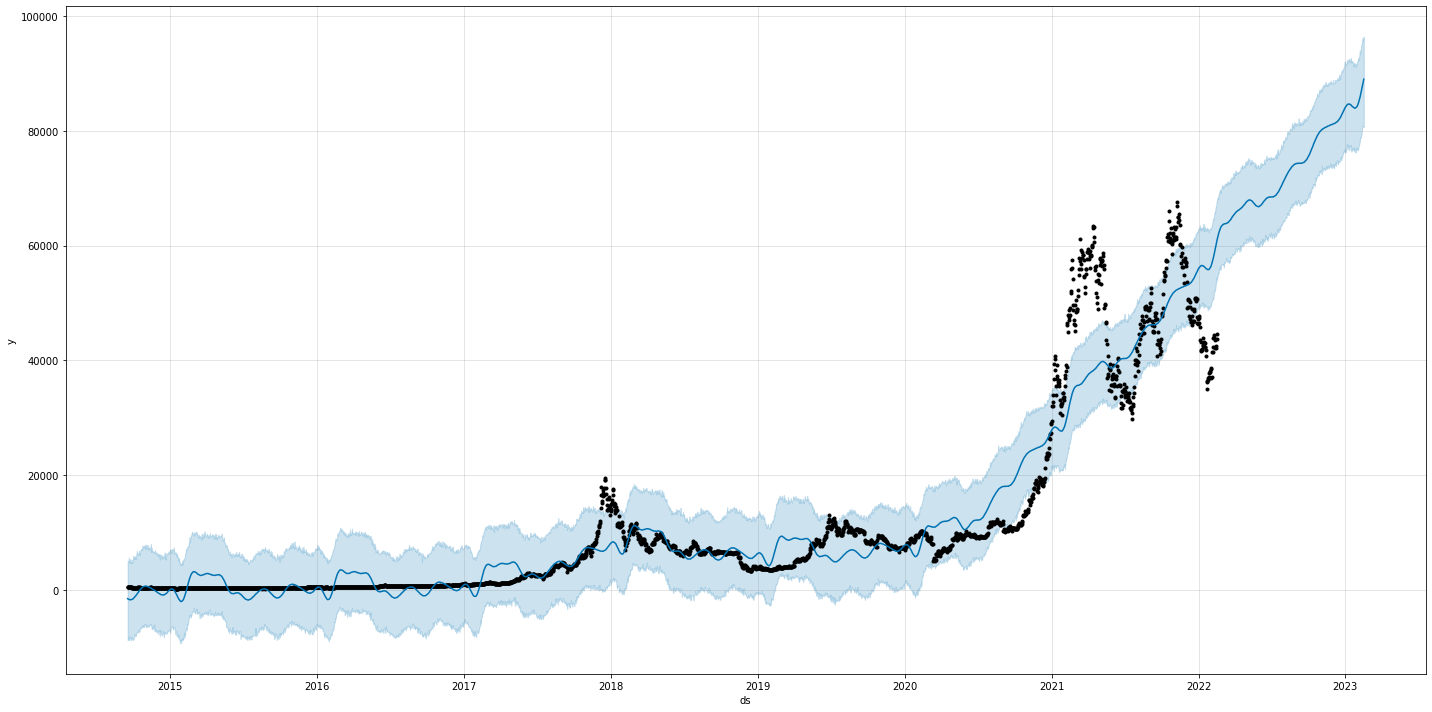

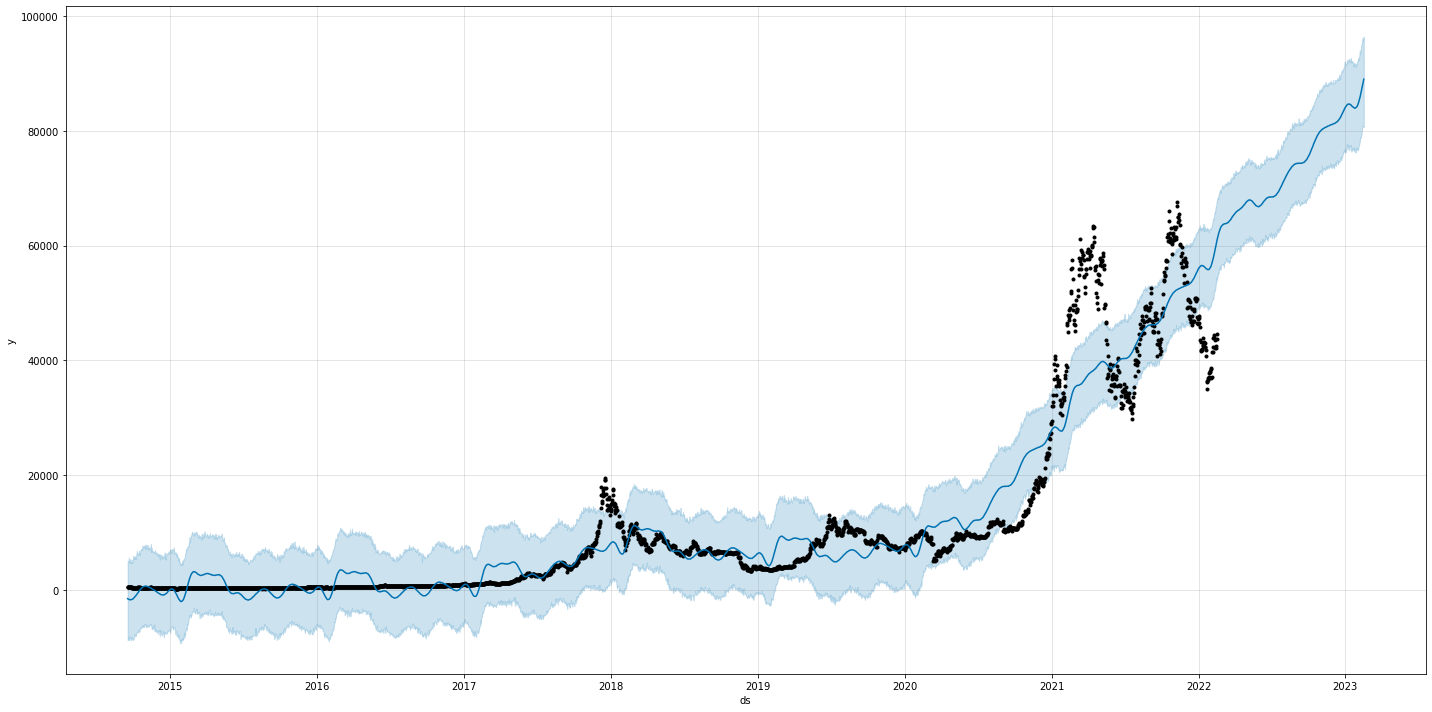

In [15]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))